# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [5]:
medical.shape

(1338, 8)

In [6]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

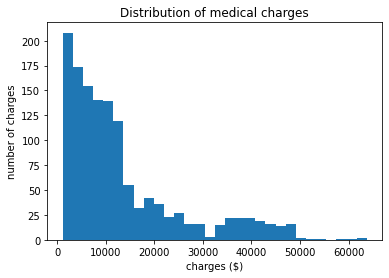

In [7]:
_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('charges ($)')
_ = plt.ylabel('number of charges')
_ = plt.title('Distribution of medical charges')
plt.show()

In [8]:
mean = np.mean(medical.charges)
std = np.std(medical.charges)
pstd = np.std(medical.charges, ddof=1)
print('mean:', mean, ', sample std:', std, ', estimated polutation std:', pstd)

mean: 13270.422265141257 , sample std: 12105.484975561605 , estimated polutation std: 12110.011236693994


In [9]:
median = np.median(medical.charges)
print('median:', median) 

median: 9382.033


The data is not normally distributed and most of the charges are less than \$1000. median might be better than mean for this dataset? Also, the std is close to mean, the data is widely spreaded out from the mean.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ the appropriate stfequentist test should be one-sided (lower half) of the confidence interval because the administrator only worried about if the average charge is more than \$12000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [10]:
# since the administrator's concern is to make sure the average charge is more than $12000, one-sided interval should be used?
# will use t-distribution here becasue population variance is unknown?!
cv = t.ppf(0.95, 1338-1)
se = pstd/np.sqrt(1338)
moe = cv * se
print('critical value:', cv)
print('margin of error:', moe)
print('95% confidence one-sided interval for the mean: (', mean-moe, ', inf )')

critical value: 1.6459941145571317
margin of error: 544.9350813250251
95% confidence one-sided interval for the mean: ( 12725.48718381623 , inf )


In [11]:
# MK code:
# Calculate the 95% Confidence Interval using t.ppf(q, df, loc=0, scale=1)
# one-tail: 1-0.95 = 0.05  [0.05, 0.95]
t.ppf(0.05, 50-1, mean, se)  # use se instead of pstd here! # %%%%% not sure if this code work

12715.370829324514

Sicne the lower bound is above 12000, with 95% chance that a medical charge will be more than 12725. It is unlikely that  average medical charge will be lower than 12000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ <br>Null hypothesis: the mean of the two groups are the same <br> Alternative hypothesis: the mean of the two groups are different. <br> assumption: the underlying population variances of the two groups are equal.

reference: https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test/two-sample-t-test.html#:~:text=The%20pooled%20standard%20deviation%20is,is%20written%20as%20sp.&text=The%20numerator%20of%20the%20test,the%20two%20unknown%20population%20means.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [12]:
# calculate the pooled standard deviation of the two groups
# Group 0 = without insurance, Group 1= with insurance
G0 = medical.charges[medical.insuranceclaim == 0]
G1 = medical.charges[medical.insuranceclaim == 1]
G = medical.charges

# calculate sample size: n0, n1
n0 = len(G0)
n1 = len(G1)
n = len(G)
print(G0.head())
print(n0)
print(G1.head())
print(n1)
print(G.head())
print(n)
print(n == n0 + n1) # To make sure no missing data (with Na etc..)

2     4449.46200
3    21984.47061
5     3756.62160
7     7281.50560
8     6406.41070
Name: charges, dtype: float64
555
0     16884.9240
1      1725.5523
4      3866.8552
6      8240.5896
10     2721.3208
Name: charges, dtype: float64
783
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64
1338
True


In [13]:
# n1 = np.sum(medical.insuranceclaim) # alternative way to calulate n1

In [14]:
# calculate population std using the two groups: s0, s1
s0 = np.std(G0, ddof=1)
s1 = np.std(G1, ddof=1)
s = np.std(G, ddof=1)
print(s0, s1, s)

6446.510126811736 14045.928418802127 12110.011236693994


In [15]:
# calculate the pooled standard deviation of the two groups: sp
sp = np.sqrt(((n0-1)*s0**2 + (n1-1)*s1**2)/(n0+n1-2))
print(sp)

11520.034268775256


In [16]:
# calcualte t-test statistic of the two groups
# calcualte mean of the two groups: x0_bar, x1_bar
x0_bar = np.mean(G0)
x1_bar = np.mean(G1)
x_bar = np.mean(G)
print(x0_bar, x1_bar, x_bar)
print((x0_bar + x1_bar)/2 == x_bar)

8821.421892306294 16423.928276537663 13270.422265141257
False


In [17]:
# calcualte t-test statistic of the two groups: t
tts = (x0_bar - x1_bar)/(sp*np.sqrt(1/n0 + 1/n1))
print(tts)

-11.89329903087671


In [18]:
# calculate p-value, assuming 95% confidence level
# refer to 'https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means'
# t-distribution: t.cdf(x, df, loc=0, scale=1)
# df = n0 + n1 -2
p_half = t.cdf(tts, n0+n1-2) # we don't usually need to specify mean and std for t-distribution, t.cdf, t.ppf
p = p_half*2
print(p)

4.461230231620972e-31


In [19]:
# Calcualte t-statistic and p-value using t.ttest_ind(a, b[, axis, equal_var, nan_policy])
from scipy import stats
stats.ttest_ind(G0, G1)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test